In [1]:
# Assignment 10.1a

import re

def tokenize(sentence):
    # Use regex to split the sentence into words while removing basic punctuation
    tokens = re.findall(r'\b\w+\b', sentence.lower())
    return tokens

In [2]:
# Assignment 10.1b
# Implement an `ngram` function that splits tokens into N-grams
def ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tokens[i:i + n])
    return ngrams

In [3]:
# Assignment 10.1c
# Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = []
    for token in tokens:
        if token not in token_index:
            token_index[token] = len(token_index) + 1

        # Create a one-hot encoded vector for the current token
        one_hot_vector = [0] * num_words
        one_hot_vector[token_index[token] - 1] = 1

        results.append(one_hot_vector)

    return results

In [4]:
# Assignment 10.2

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

2023-08-06 21:03:45.821220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 21:03:45.946800: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 21:03:45.948041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 21:03:47.157328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# Loading the IMDB data for use with an Embedding layer
max_features = 10000  # The maximum number of words to keep in the vocabulary
maxlen = 200  # Cut off reviews after this many words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
# Create the sequential model with embeddings
embedding_dim = 32  # Dimensionality of the embedding space

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())  # Flatten the 2D embedding into a 1D vector
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 0.4963 - accuracy: 0.7523 - val_loss: 0.3174 - val_accuracy: 0.8708
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2188 - accuracy: 0.9167 - val_loss: 0.2853 - val_accuracy: 0.8792
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1153 - accuracy: 0.9682 - val_loss: 0.2947 - val_accuracy: 0.8774
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0520 - accuracy: 0.9920 - val_loss: 0.3138 - val_accuracy: 0.8748
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 0.0231 - accuracy: 0.9983 - val_loss: 0.3422 - val_accuracy: 0.8728
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0112 - accuracy: 0.9997 - val_loss: 0.3694 - val_accuracy: 0.8734
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 0.3902 - val_accuracy: 0.8744
Epoch 

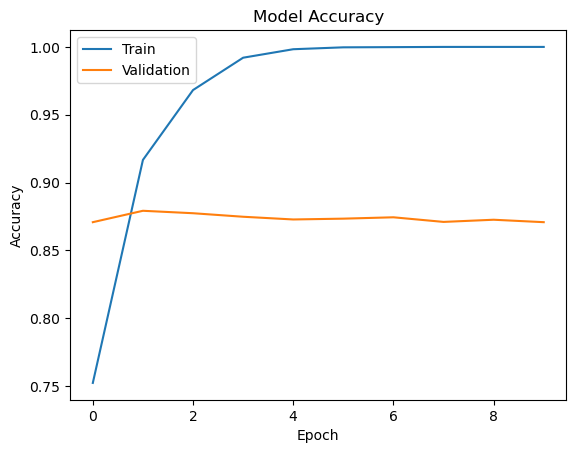

In [8]:
# Training and validation accuracy curve visualizations
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)

In [9]:
# Model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

782/782 [==============================] - 2s 2ms/step - loss: 0.4584 - accuracy: 0.8692
Test Loss: 0.4584
Test Accuracy: 0.8692


Epoch 1/10


2023-08-06 21:05:01.474189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-06 21:05:01.476431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-06 21:05:01.479426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8059

2023-08-06 21:06:12.212781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-06 21:06:12.215016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-06 21:06:12.216690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 78s 120ms/step - loss: 0.4128 - accuracy: 0.8059 - val_loss: 0.3151 - val_accuracy: 0.8708
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.2323 - accuracy: 0.9117 - val_loss: 0.3037 - val_accuracy: 0.8720
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1687 - accuracy: 0.9381 - val_loss: 0.3736 - val_accuracy: 0.8650
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1364 - accuracy: 0.9518 - val_loss: 0.3573 - val_accuracy: 0.8666
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1117 - accuracy: 0.9586 - val_loss: 0.4551 - val_accuracy: 0.8636
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0923 - accuracy: 0.9681 - val_loss: 0.4751 - val_accuracy: 0.8602
Epoch 7/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0800 - accuracy: 0.9710 - val_loss: 0.4691 - val_accuracy: 0.8

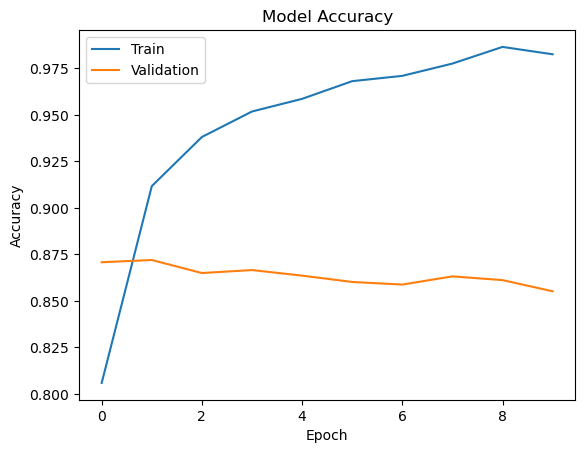

782/782 [==============================] - 35s 45ms/step - loss: 0.6003 - accuracy: 0.8484
Test Loss: 0.6003
Test Accuracy: 0.8484


In [10]:
# Assignment 10.3
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDB dataset and preprocess it
max_features = 10000  # The maximum number of words to keep in the vocabulary
maxlen = 200  # Cut off reviews after this many words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Create the LSTM model
embedding_dim = 32  # Dimensionality of the embedding space

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(LSTM(32))  # LSTM layer with 32 units
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Visualize the training and validation accuracy curves
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)

# Evaluate the model on the test set and print performance metrics
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,308,737
Trainable params: 1,308,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 11s 67ms/step - loss: 0.6179 - accuracy: 0.6776 - val_lo

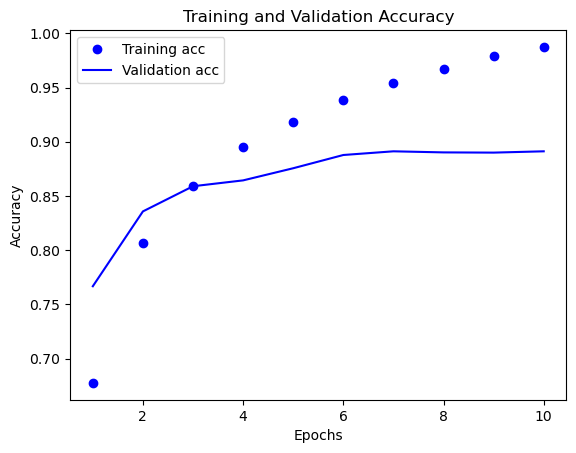

In [11]:
# Assignment 10.4

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the IMDB data and preprocess it
max_features = 10000  # Consider only the top 10,000 most common words in the dataset
maxlen = 500  # Limit each review to 500 words

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Build the 1D ConvNet model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot the training and validation accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()